# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | kalabo
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | praia da vitoria
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | tomatlan
Processing Record 8 of Set 1 | dakhla
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | kailua-kona
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | rewa
Processing Record 17 of Set 1 | polyarnyy
Processing Record 18 of Set 1 | borzya
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | sisimiut
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,295.19,73,20,9.26,MG,1718735367
1,kalabo,-14.9700,22.6814,291.10,34,0,1.95,ZM,1718735367
2,atafu village,-8.5421,-172.5159,302.41,72,98,6.26,TK,1718735368
3,praia da vitoria,38.7333,-27.0667,294.29,64,40,4.22,PT,1718735257
4,richards bay,-28.7830,32.0377,292.78,74,0,2.53,ZA,1718735369


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,295.19,73,20,9.26,MG,1718735367
1,kalabo,-14.9700,22.6814,291.10,34,0,1.95,ZM,1718735367
2,atafu village,-8.5421,-172.5159,302.41,72,98,6.26,TK,1718735368
3,praia da vitoria,38.7333,-27.0667,294.29,64,40,4.22,PT,1718735257
4,richards bay,-28.7830,32.0377,292.78,74,0,2.53,ZA,1718735369


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

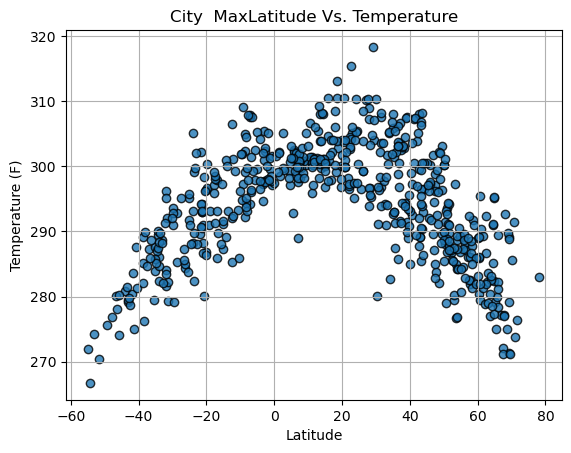

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City  MaxLatitude Vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

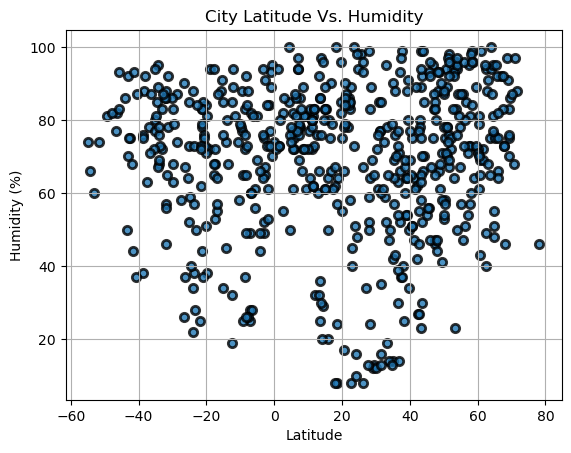

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
           edgecolor="black", linewidth=2, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

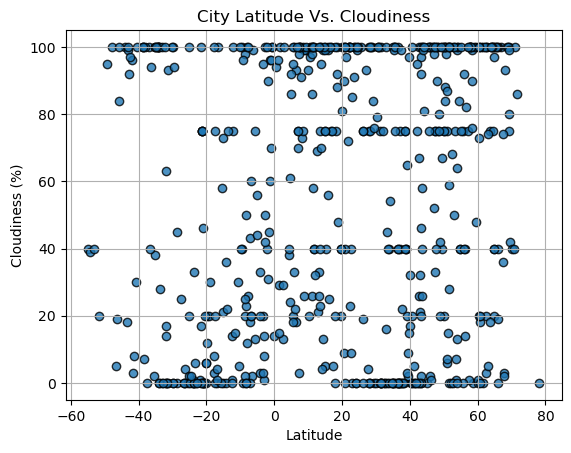

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

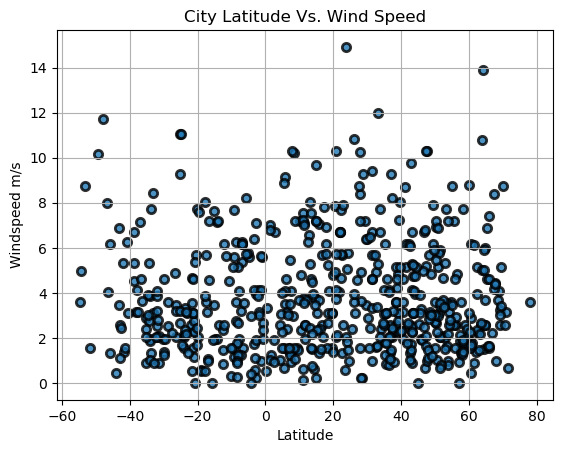

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
           edgecolor="black", linewidth=2, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Windspeed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def plt_linear_regression(x_values,y_values,title,text_coordi):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordi, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    print(f'The linear regression model is {line_eq}')
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,praia da vitoria,38.7333,-27.0667,294.29,64,40,4.22,PT,1718735257
6,tomatlan,19.9333,-105.2500,304.02,55,81,4.80,MX,1718735370
7,dakhla,23.6848,-15.9580,295.16,73,100,14.92,EH,1718735170
10,yellowknife,62.4560,-114.3525,292.44,40,20,5.14,CA,1718735372
11,anadyr,64.7500,177.4833,282.43,76,40,6.00,RU,1718735373


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,295.19,73,20,9.26,MG,1718735367
1,kalabo,-14.9700,22.6814,291.10,34,0,1.95,ZM,1718735367
2,atafu village,-8.5421,-172.5159,302.41,72,98,6.26,TK,1718735368
4,richards bay,-28.7830,32.0377,292.78,74,0,2.53,ZA,1718735369
5,adamstown,-25.0660,-130.1015,295.77,85,100,11.07,PN,1718735369


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7093909399245107
The linear regression model is y = -0.33 x + 307.28


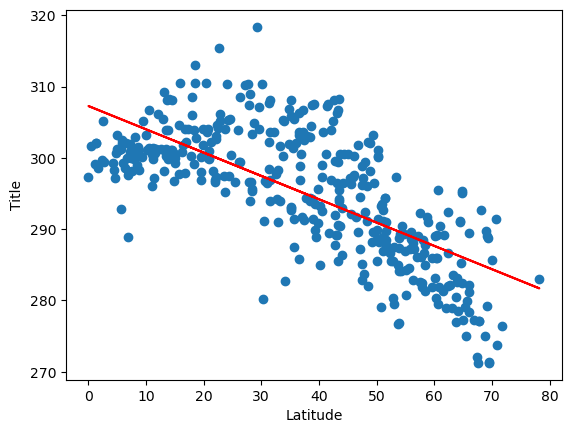

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt_linear_regression(x_values,y_values, 'Max Temp', (6,40))

The r-squared is: 0.8182331010439691
The linear regression model is y = 0.5 x + 302.66


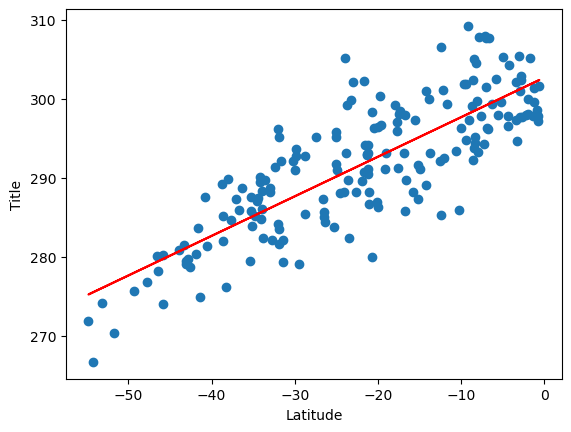

In [18]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the southern hemisphere, the max temperature increases while the city is close to 0 degree latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09617641983817964
The linear regression model is y = 0.11 x + 65.39


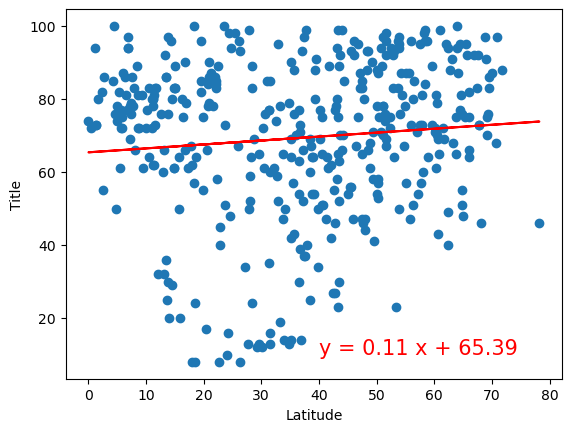

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.14962542749214489
The linear regression model is y = -0.2 x + 64.55


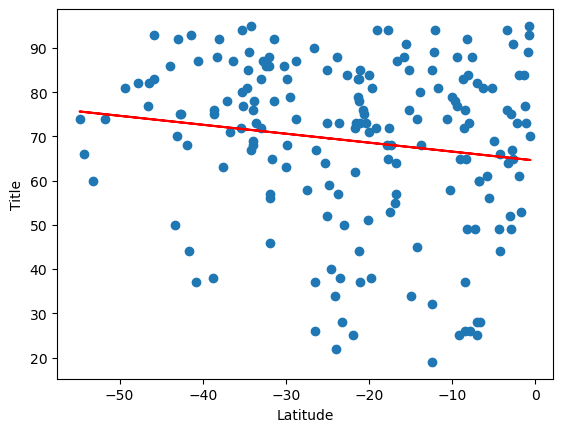

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the southern hemisphere, the humidity slightly decreases while the city is close to 0 degree latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.023944243723798397
The linear regression model is y = -0.05 x + 60.98


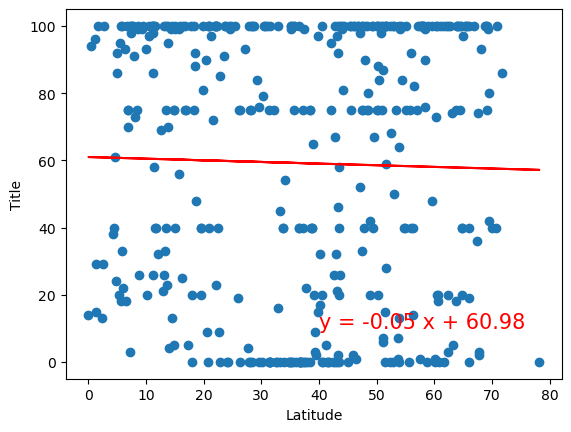

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.12003276371145397
The linear regression model is y = -0.35 x + 34.12


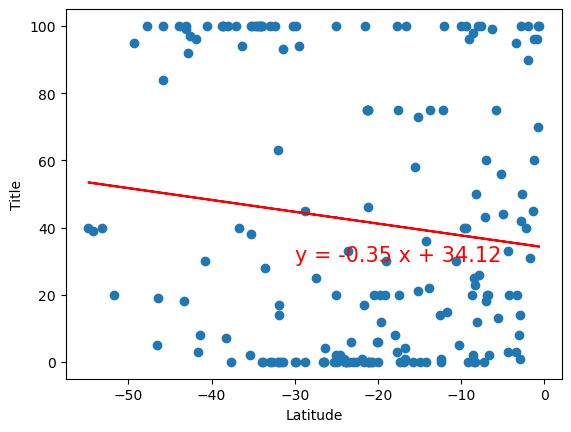

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the southern hemisphere, the cloudiness tend to decreases while the city is close to 0 degree latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.059112248863242706
The linear regression model is y = -0.01 x + 4.15


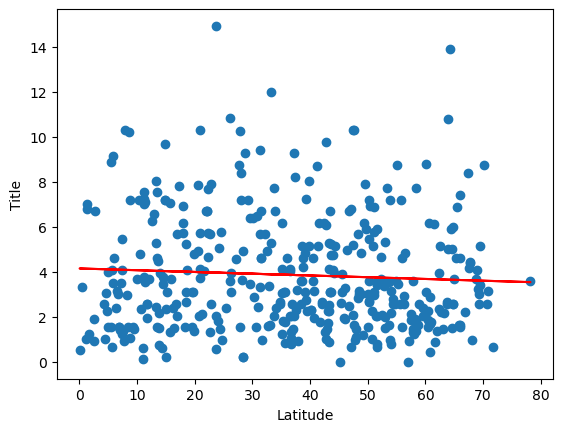

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.11345087478485998
The linear regression model is y = -0.02 x + 3.09


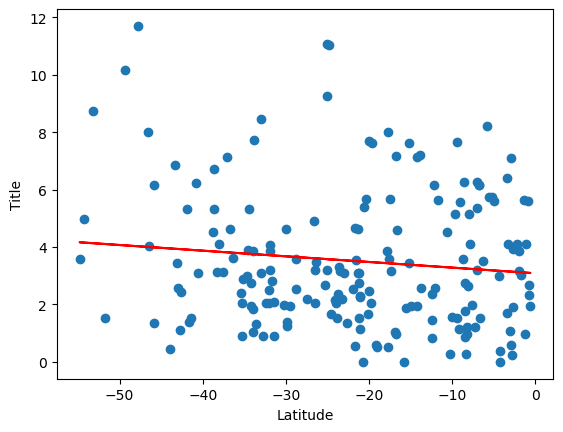

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the southern hemisphere, the wind speed  have a slightly steeper slope while the city is close to 0 degree latitude.